## **Data Exploration**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data = data.drop('id', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **Removing Outliers**

In [8]:
data.drop(data[(data['height'] > data['height'].quantile(0.99)) | (data['height'] < data['height'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.99)) | (data['weight'] < data['weight'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.99)) | (data['ap_hi'] < data['ap_hi'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.99)) | (data['ap_lo'] < data['ap_lo'].quantile(0.01))].index,inplace=True)
len(data)

66532

In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,19471.713146,1.348900,164.465460,73.837733,126.624902,90.024680,1.362337,1.224103,0.087371,0.053057,0.804260,0.496814
std,2463.232418,0.476626,7.311396,12.902688,16.032104,89.202894,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994
min,10798.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## **Data Transformation**

In [10]:
data['age'] = (data['age'] / 365).round().astype('int')

print(data.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [11]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
data['age_group'] = pd.cut(data['age'], bins=7, labels=range(7), include_lowest=True,right=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [12]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data.head()

bmiMin = int(data['bmi'].min())
bmiMax = int(data['bmi'].max())

print(bmiMin, bmiMax)

data['bmi'] = pd.cut(data['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()


data["bmi"].value_counts(normalize=True)

15 52


1    0.536013
2    0.300833
3    0.092061
0    0.053448
4    0.016488
5    0.001157
Name: bmi, dtype: float64

In [13]:
data['map'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

print(mapMin, mapMax)

data['map'] = pd.cut(data['map'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()

70 726


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [14]:
null_rows = data[data.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [15]:
data=data.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,0
1,1,3,1,0,0,1,1,4,3,0
2,1,3,1,0,0,0,1,4,1,0
3,2,1,1,0,0,1,1,3,2,0
4,1,1,1,0,0,0,0,3,1,0


In [16]:
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,0.348900,0.362337,0.224103,0.087371,0.053057,0.804260,0.496814,4.044144,1.485601,0.038012
std,0.476626,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994,1.379105,0.808479,0.386662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000


## **Clustering**

In [18]:
cost = []
num_clusters = range(1,9) # 1 to 8
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 8, verbose=0,random_state=42)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

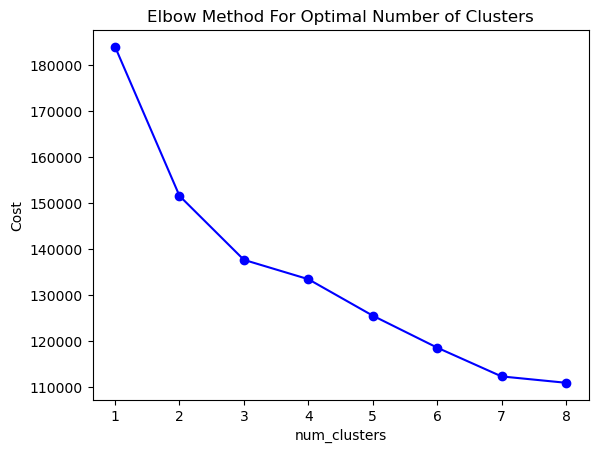

In [19]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [20]:
km = KModes(n_clusters=2, init = "Huang", n_init = 8,random_state=42)
clusters = km.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [21]:
data.insert(0,"clusters",clusters,True)

data.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,1,0,0,0,0,1,0,3,1,0
1,0,0,2,0,0,0,1,1,4,3,0
2,0,0,2,0,0,0,0,1,4,1,0
3,1,1,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,3,1,0


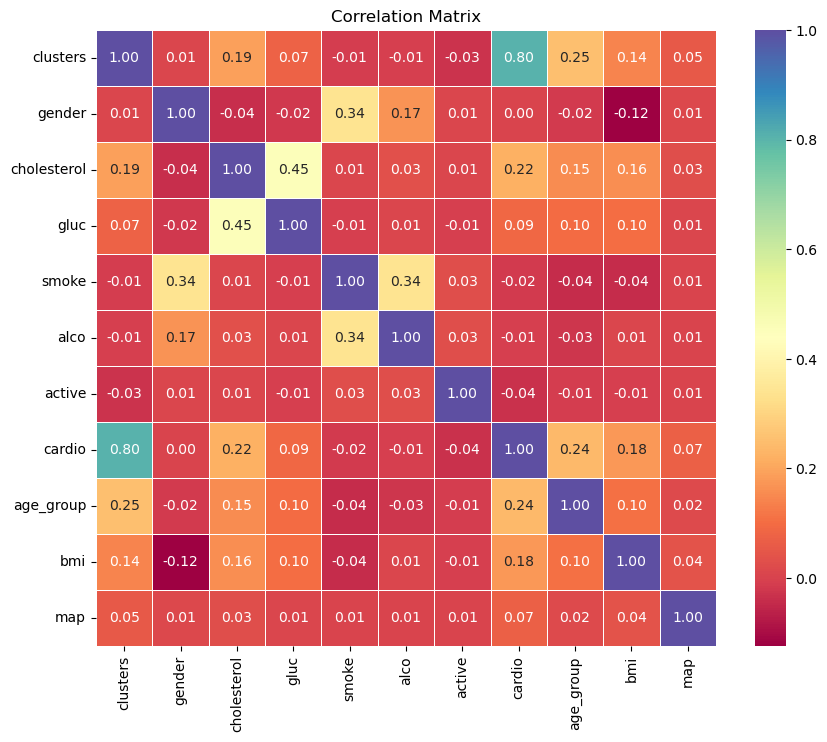

In [22]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

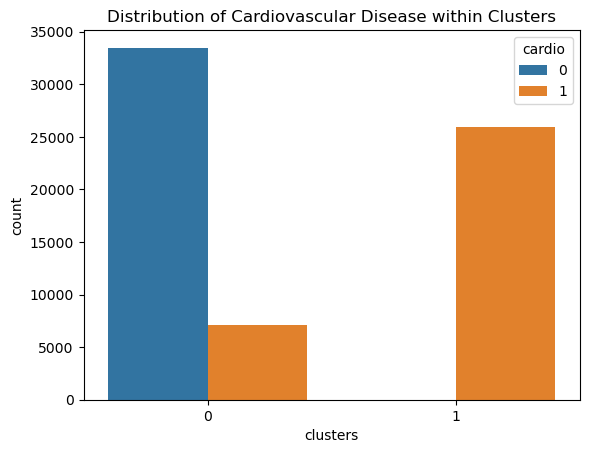

In [23]:
sns.countplot(x='clusters', hue='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## **Split and Train Data**

In [24]:
x = data.drop(['cardio', 'gender', 'alco', 'smoke'], axis=1)
y = data['cardio']

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66532 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     66532 non-null  uint16
 1   cholesterol  66532 non-null  int64 
 2   gluc         66532 non-null  int64 
 3   active       66532 non-null  int64 
 4   age_group    66532 non-null  int64 
 5   bmi          66532 non-null  int64 
 6   map          66532 non-null  int64 
dtypes: int64(6), uint16(1)
memory usage: 3.7 MB


In [26]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [27]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Oversample the minority class
majority_class_indices = np.where(y == 0)[0]
minority_class_indices = np.where(y == 1)[0]

majority_class_samples = x_scaled[majority_class_indices]
minority_class_samples = x_scaled[minority_class_indices]
minority_class_samples_upsampled = resample(minority_class_samples,
                                            replace=True,
                                            n_samples=len(majority_class_samples),
                                            random_state=42)

# Concatenate the upsampled minority class samples with the original majority class samples
x_augmented = np.concatenate((majority_class_samples, minority_class_samples_upsampled), axis=0)

# Create the corresponding target labels for the augmented data
y_majority = np.zeros(len(majority_class_samples))
y_minority_upsampled = np.ones(len(minority_class_samples_upsampled))
y_augmented = np.concatenate((y_majority, y_minority_upsampled), axis=0)

# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)


In [28]:
# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)

# Split the augmented data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_augmented_scaled, y_augmented, test_size=0.2, random_state=42)

print("Training data (x):")
print(x_train)
print("\nTraining data (y):")
print(y_train)
print("\nTesting data (x):")
print(x_test)
print("\nTesting data (y):")
print(y_test)

Training data (x):
[[ 1.18037807e+00 -4.96105153e-01  1.51736039e+00 ...  1.39957864e+00
  -4.69963282e-01 -3.76889485e-02]
 [-8.65887601e-01 -5.26271056e-01 -5.15468605e-01 ... -1.36275649e-01
  -6.58307142e-01 -7.58312715e-02]
 [-7.68278786e-01 -6.65760009e-01 -5.57862646e-01 ...  7.96077026e-04
  -4.67022019e-01 -5.28607359e-03]
 ...
 [ 1.35722539e+00  2.50781145e+00 -3.57696812e-01 ...  1.39067131e+00
   6.33624218e-01 -1.30763640e-01]
 [-8.06858729e-01 -4.76807904e-01 -2.98242409e-01 ... -8.08907862e-01
   5.82063768e-01 -1.15969585e-02]
 [-9.44629556e-01 -4.03665780e-01 -2.89736253e-01 ... -8.46419781e-01
  -3.84686090e-01 -2.39660274e-02]]

Training data (y):
[1. 1. 0. ... 1. 0. 0.]

Testing data (x):
[[ 1.33849767 -0.61864243 -0.48701317 ...  0.74170783  0.43994004
  -0.05390918]
 [ 1.32211296  1.08874423 -0.40574074 ...  0.63845263  0.64903063
   0.02933483]
 [-0.89783813  2.21222671 -0.39828653 ... -0.91561523 -0.66680048
  -0.05964646]
 ...
 [ 1.10820193  1.06055912 -0.43335

In [29]:
from sklearn.ensemble import RandomForestClassifier

### **RNN MODEL**

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [31]:
# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=7, hidden_size=16, num_layers=1, batch_first=True)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        if len(out.shape) == 3:
            out = self.fc(out[:, -1, :])
       
        elif len(out.shape) == 2:
            out = self.fc(out)
        out = torch.sigmoid(out)
        return out




In [32]:
# Create the KDNN model using Keras
def create_kdnn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7))
    model.add(ReLU())
    model.add(Dense(12))
    model.add(ReLU())
    model.add(Dense(8))
    model.add(ReLU())
    model.add(Dense(4))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model


In [33]:
def preprocess_data(X_train, y_train, batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [35]:
# Train the PyTorch model
def train_pytorch_model(model, train_loader, epochs, print_interval):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % print_interval == 0 or epoch == 0:
            average_loss = total_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}')

    # Calculate final accuracy and confusion matrix
    final_predicted_labels = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_labels.extend(torch.round(outputs).detach().numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate final accuracy and confusion matrix
    final_accuracy = accuracy_score(final_true_labels, final_predicted_labels)
    final_confusion_matrix = confusion_matrix(final_true_labels, final_predicted_labels)
    print('Final Accuracy:', final_accuracy)
    print('Final Confusion Matrix:')
    print(final_confusion_matrix)
    print("Classification Report for RNN:")
    print(classification_report(final_true_labels, final_predicted_labels, digits=4))

rnn_model = RNNModel()
batch_size = 64
epochs = 150
print_interval = 5
train_loader = preprocess_data(x_train, y_train, batch_size)
train_pytorch_model(rnn_model, train_loader, epochs, print_interval)

Epoch 1/150, Average Loss: 0.38061685952732927
Epoch 5/150, Average Loss: 0.1612301124716033
Epoch 10/150, Average Loss: 0.15136006694362725
Epoch 15/150, Average Loss: 0.14933817945376235
Epoch 20/150, Average Loss: 0.14858038394112172
Epoch 25/150, Average Loss: 0.14804517664237832
Epoch 30/150, Average Loss: 0.1477230046892465
Epoch 35/150, Average Loss: 0.14754549087233298
Epoch 40/150, Average Loss: 0.14732993181834939
Epoch 45/150, Average Loss: 0.1472606838701945
Epoch 50/150, Average Loss: 0.1471226532946885
Epoch 55/150, Average Loss: 0.14698872660490347
Epoch 60/150, Average Loss: 0.14692882828975237
Epoch 65/150, Average Loss: 0.14677662236822975
Epoch 70/150, Average Loss: 0.14678187778257412
Epoch 75/150, Average Loss: 0.14676057823278285
Epoch 80/150, Average Loss: 0.14664318616387378
Epoch 85/150, Average Loss: 0.1464980238138419
Epoch 90/150, Average Loss: 0.14644316434326138
Epoch 95/150, Average Loss: 0.14651837567559564
Epoch 100/150, Average Loss: 0.1462634681515938

In [36]:
# Function to calculate ROC curve
def calculate_roc_curve(model, train_loader):
    final_predicted_probs = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_probs.extend(outputs.numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(final_true_labels, final_predicted_probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


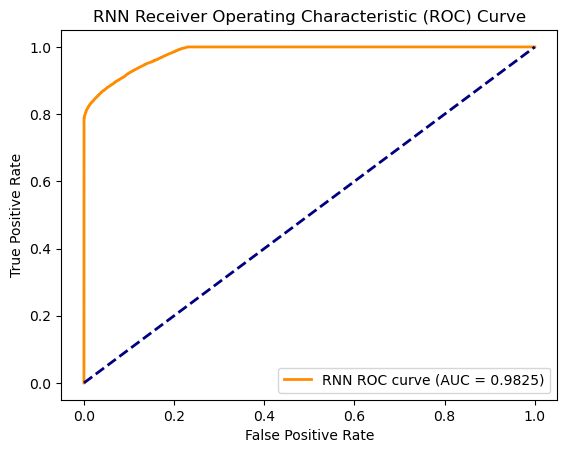

In [37]:
fpr, tpr, roc_auc = calculate_roc_curve(rnn_model, train_loader)
plot_roc_curve(fpr, tpr, roc_auc, 'RNN')

### **KDNN MODEL**

In [38]:
# Train the KDNN model using Keras
kdnn_model = create_kdnn_model()
kdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kdnn_model.fit( x_train, y_train, epochs=50, batch_size=batch_size)

Epoch 1/50
837/837 [==============================] - 0s 357us/step - loss: 0.4100 - accuracy: 0.8794
Epoch 2/50
837/837 [==============================] - 0s 550us/step - loss: 0.2665 - accuracy: 0.9088
Epoch 3/50
837/837 [==============================] - 0s 350us/step - loss: 0.2191 - accuracy: 0.9097
Epoch 4/50
837/837 [==============================] - 0s 348us/step - loss: 0.1939 - accuracy: 0.9101
Epoch 5/50
837/837 [==============================] - 0s 348us/step - loss: 0.1787 - accuracy: 0.9103
Epoch 6/50
837/837 [==============================] - 0s 348us/step - loss: 0.1695 - accuracy: 0.9118
Epoch 7/50
837/837 [==============================] - 0s 347us/step - loss: 0.1635 - accuracy: 0.9116
Epoch 8/50
837/837 [==============================] - 0s 346us/step - loss: 0.1596 - accuracy: 0.9116
Epoch 9/50
837/837 [==============================] - 0s 348us/step - loss: 0.1570 - accuracy: 0.9122
Epoch 10/50
837/837 [==============================] - 0s 351us/step - loss: 0.155

In [39]:
y_pred = kdnn_model.predict(x_train)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Classification Report for KDNN:")
print(classification_report(y_train, y_pred_binary,  digits=4))

1674/1674 [==============================] - 0s 233us/step
Classification Report for KDNN:
              precision    recall  f1-score   support

         0.0     0.9201    0.9027    0.9113     26824
         1.0     0.9042    0.9214    0.9127     26740

    accuracy                         0.9120     53564
   macro avg     0.9122    0.9120    0.9120     53564
weighted avg     0.9122    0.9120    0.9120     53564



419/419 [==============================] - 0s 235us/step


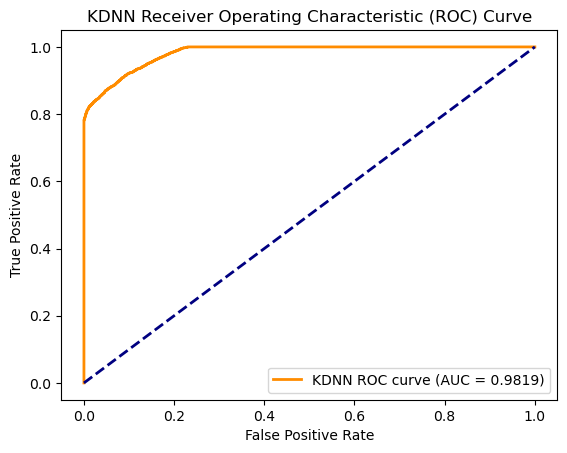

In [40]:
def calculate_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(kdnn_model, x_test, y_test)
plot_roc_curve(fpr, tpr, roc_auc, 'KDNN')

### **ML ALGORITHMS**

In [41]:
!pip install catboost
from catboost import CatBoostClassifier

In [42]:
!pip install xgboost

Learning rate set to 0.056385
0:	learn: 0.5546368	total: 66ms	remaining: 1m 5s
1:	learn: 0.4542721	total: 71ms	remaining: 35.4s
2:	learn: 0.3798850	total: 75.8ms	remaining: 25.2s
3:	learn: 0.3261547	total: 80.6ms	remaining: 20.1s
4:	learn: 0.2886399	total: 85.8ms	remaining: 17.1s
5:	learn: 0.2581734	total: 91.1ms	remaining: 15.1s
6:	learn: 0.2338652	total: 96.5ms	remaining: 13.7s
7:	learn: 0.2163498	total: 101ms	remaining: 12.5s
8:	learn: 0.2020541	total: 106ms	remaining: 11.6s
9:	learn: 0.1966435	total: 110ms	remaining: 10.9s
10:	learn: 0.1888973	total: 115ms	remaining: 10.4s
11:	learn: 0.1825103	total: 120ms	remaining: 9.91s
12:	learn: 0.1776028	total: 125ms	remaining: 9.49s
13:	learn: 0.1736715	total: 130ms	remaining: 9.13s
14:	learn: 0.1696911	total: 134ms	remaining: 8.81s
15:	learn: 0.1675403	total: 139ms	remaining: 8.56s
16:	learn: 0.1657274	total: 145ms	remaining: 8.36s
17:	learn: 0.1631972	total: 149ms	remaining: 8.15s
18:	learn: 0.1610498	total: 154ms	remaining: 7.96s
19:	lear

183:	learn: 0.1443063	total: 996ms	remaining: 4.42s
184:	learn: 0.1442744	total: 1s	remaining: 4.41s
185:	learn: 0.1442313	total: 1.01s	remaining: 4.42s
186:	learn: 0.1441874	total: 1.02s	remaining: 4.44s
187:	learn: 0.1441455	total: 1.03s	remaining: 4.44s
188:	learn: 0.1440764	total: 1.03s	remaining: 4.44s
189:	learn: 0.1440088	total: 1.04s	remaining: 4.44s
190:	learn: 0.1439676	total: 1.05s	remaining: 4.44s
191:	learn: 0.1439280	total: 1.05s	remaining: 4.43s
192:	learn: 0.1438788	total: 1.06s	remaining: 4.42s
193:	learn: 0.1438175	total: 1.06s	remaining: 4.42s
194:	learn: 0.1437965	total: 1.07s	remaining: 4.41s
195:	learn: 0.1437366	total: 1.07s	remaining: 4.4s
196:	learn: 0.1436590	total: 1.08s	remaining: 4.39s
197:	learn: 0.1436123	total: 1.08s	remaining: 4.38s
198:	learn: 0.1435734	total: 1.09s	remaining: 4.38s
199:	learn: 0.1435343	total: 1.09s	remaining: 4.38s
200:	learn: 0.1434874	total: 1.1s	remaining: 4.37s
201:	learn: 0.1434511	total: 1.1s	remaining: 4.36s
202:	learn: 0.1434

375:	learn: 0.1358643	total: 1.99s	remaining: 3.31s
376:	learn: 0.1358209	total: 2s	remaining: 3.3s
377:	learn: 0.1357739	total: 2s	remaining: 3.29s
378:	learn: 0.1357145	total: 2.01s	remaining: 3.29s
379:	learn: 0.1356791	total: 2.01s	remaining: 3.29s
380:	learn: 0.1356139	total: 2.02s	remaining: 3.28s
381:	learn: 0.1355572	total: 2.02s	remaining: 3.27s
382:	learn: 0.1355197	total: 2.03s	remaining: 3.27s
383:	learn: 0.1354753	total: 2.03s	remaining: 3.26s
384:	learn: 0.1354350	total: 2.04s	remaining: 3.25s
385:	learn: 0.1354103	total: 2.04s	remaining: 3.25s
386:	learn: 0.1353671	total: 2.05s	remaining: 3.24s
387:	learn: 0.1353080	total: 2.05s	remaining: 3.24s
388:	learn: 0.1352760	total: 2.06s	remaining: 3.23s
389:	learn: 0.1352356	total: 2.06s	remaining: 3.23s
390:	learn: 0.1351999	total: 2.07s	remaining: 3.22s
391:	learn: 0.1351737	total: 2.07s	remaining: 3.22s
392:	learn: 0.1351500	total: 2.08s	remaining: 3.21s
393:	learn: 0.1351099	total: 2.08s	remaining: 3.21s
394:	learn: 0.13506

535:	learn: 0.1293819	total: 2.8s	remaining: 2.42s
536:	learn: 0.1293405	total: 2.81s	remaining: 2.42s
537:	learn: 0.1293168	total: 2.81s	remaining: 2.41s
538:	learn: 0.1292716	total: 2.82s	remaining: 2.41s
539:	learn: 0.1292406	total: 2.82s	remaining: 2.4s
540:	learn: 0.1292061	total: 2.83s	remaining: 2.4s
541:	learn: 0.1291693	total: 2.83s	remaining: 2.39s
542:	learn: 0.1291312	total: 2.84s	remaining: 2.39s
543:	learn: 0.1291027	total: 2.84s	remaining: 2.38s
544:	learn: 0.1290736	total: 2.85s	remaining: 2.38s
545:	learn: 0.1290202	total: 2.85s	remaining: 2.37s
546:	learn: 0.1289835	total: 2.86s	remaining: 2.37s
547:	learn: 0.1289523	total: 2.86s	remaining: 2.36s
548:	learn: 0.1289119	total: 2.87s	remaining: 2.35s
549:	learn: 0.1288745	total: 2.87s	remaining: 2.35s
550:	learn: 0.1288396	total: 2.88s	remaining: 2.35s
551:	learn: 0.1288170	total: 2.88s	remaining: 2.34s
552:	learn: 0.1287747	total: 2.89s	remaining: 2.33s
553:	learn: 0.1287482	total: 2.89s	remaining: 2.33s
554:	learn: 0.1

730:	learn: 0.1225009	total: 3.81s	remaining: 1.4s
731:	learn: 0.1224720	total: 3.81s	remaining: 1.4s
732:	learn: 0.1224333	total: 3.82s	remaining: 1.39s
733:	learn: 0.1223816	total: 3.82s	remaining: 1.39s
734:	learn: 0.1223535	total: 3.83s	remaining: 1.38s
735:	learn: 0.1223319	total: 3.83s	remaining: 1.38s
736:	learn: 0.1223025	total: 3.84s	remaining: 1.37s
737:	learn: 0.1222589	total: 3.84s	remaining: 1.36s
738:	learn: 0.1222264	total: 3.85s	remaining: 1.36s
739:	learn: 0.1221976	total: 3.85s	remaining: 1.35s
740:	learn: 0.1221616	total: 3.86s	remaining: 1.35s
741:	learn: 0.1221342	total: 3.86s	remaining: 1.34s
742:	learn: 0.1221017	total: 3.87s	remaining: 1.34s
743:	learn: 0.1220325	total: 3.87s	remaining: 1.33s
744:	learn: 0.1220124	total: 3.88s	remaining: 1.33s
745:	learn: 0.1219716	total: 3.88s	remaining: 1.32s
746:	learn: 0.1219529	total: 3.89s	remaining: 1.32s
747:	learn: 0.1219302	total: 3.89s	remaining: 1.31s
748:	learn: 0.1218984	total: 3.9s	remaining: 1.31s
749:	learn: 0.1

890:	learn: 0.1173593	total: 4.61s	remaining: 564ms
891:	learn: 0.1173323	total: 4.62s	remaining: 559ms
892:	learn: 0.1172950	total: 4.62s	remaining: 554ms
893:	learn: 0.1172654	total: 4.63s	remaining: 549ms
894:	learn: 0.1172347	total: 4.63s	remaining: 544ms
895:	learn: 0.1172074	total: 4.64s	remaining: 539ms
896:	learn: 0.1171805	total: 4.64s	remaining: 533ms
897:	learn: 0.1171452	total: 4.65s	remaining: 528ms
898:	learn: 0.1171053	total: 4.66s	remaining: 523ms
899:	learn: 0.1170806	total: 4.66s	remaining: 518ms
900:	learn: 0.1170564	total: 4.67s	remaining: 513ms
901:	learn: 0.1170295	total: 4.67s	remaining: 507ms
902:	learn: 0.1170093	total: 4.67s	remaining: 502ms
903:	learn: 0.1169673	total: 4.68s	remaining: 497ms
904:	learn: 0.1169380	total: 4.68s	remaining: 492ms
905:	learn: 0.1169012	total: 4.69s	remaining: 487ms
906:	learn: 0.1168711	total: 4.7s	remaining: 482ms
907:	learn: 0.1168462	total: 4.7s	remaining: 476ms
908:	learn: 0.1168230	total: 4.71s	remaining: 471ms
909:	learn: 0.

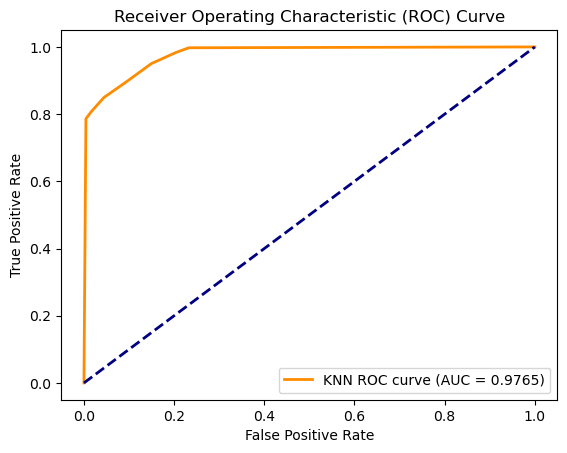

Decision Tree Metrics:
Accuracy: 0.9096
Precision: 0.9447
Recall: 0.8713
F1 Score: 0.9065


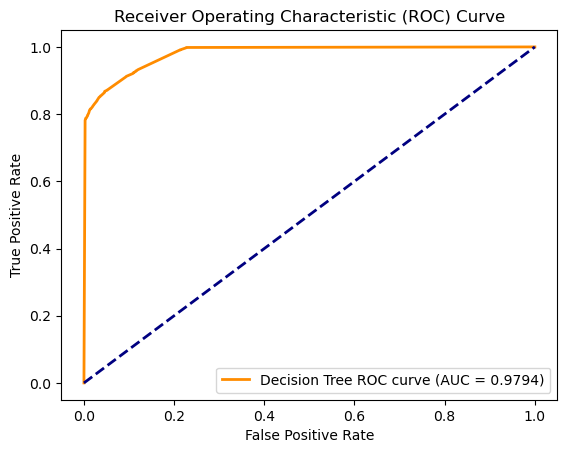

Random Forest Metrics:
Accuracy: 0.9090
Precision: 0.9391
Recall: 0.8759
F1 Score: 0.9064


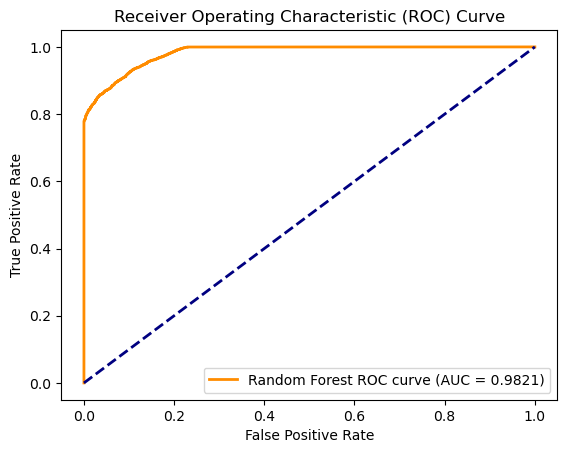

CatBoost Metrics:
Accuracy: 0.9079
Precision: 0.9263
Recall: 0.8877
F1 Score: 0.9066


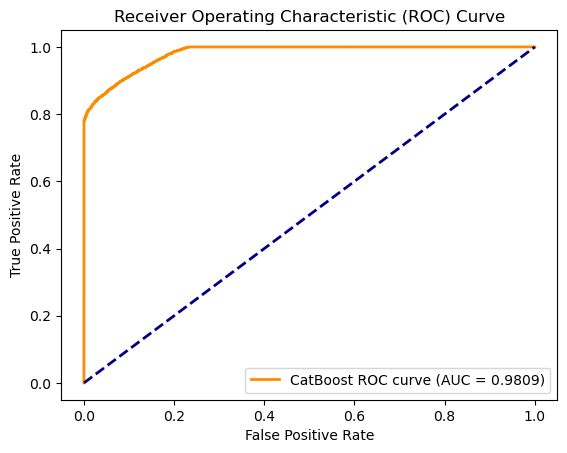

XGBoost Metrics:
Accuracy: 0.9120
Precision: 0.9445
Recall: 0.8767
F1 Score: 0.9093


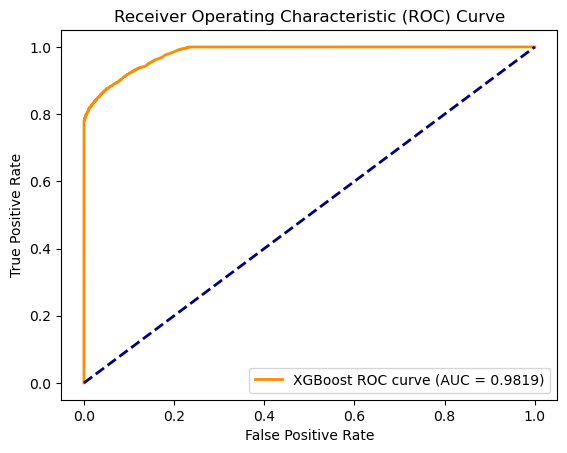

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate ROC curve
def calculate_roc_curve(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    return fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_model = knn_grid.best_estimator_

# Initialize Decision Tree model with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=1)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid.fit(x_train, y_train)
dt_model = dt_grid.best_estimator_

# Initialize Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_model = rf_grid.best_estimator_

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=1)
# Train CatBoost model
catboost_model.fit(x_train, y_train)

# Initialize XGBoost model with Extreme Gradient Boosting
xgb_model = XGBClassifier(random_state=1, booster='gbtree')
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_model = xgb_grid.best_estimator_

# Evaluate models and print metrics
models = {'KNN': knn_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'CatBoost': catboost_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    #print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_roc_curve(model, x_test, y_test)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


## **ML ENSEMBLE**

In [44]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using VotingClassifier
ensemble_models = [('KNN', knn_model), ('Decision Tree', dt_model), ('Random Forest', rf_model), ('CatBoost', catboost_model), ('XGBoost', xgb_model)]
ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
ensemble_pred = ensemble.predict(x_test)
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred)

print("Ensemble Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
#print(f"ROC AUC Score: {ensemble_roc_auc:.4f}")


Learning rate set to 0.056385
0:	learn: 0.5546368	total: 5.37ms	remaining: 5.36s
1:	learn: 0.4542721	total: 10.2ms	remaining: 5.11s
2:	learn: 0.3798850	total: 15.3ms	remaining: 5.09s
3:	learn: 0.3261547	total: 20.4ms	remaining: 5.08s
4:	learn: 0.2886399	total: 25.4ms	remaining: 5.06s
5:	learn: 0.2581734	total: 29.9ms	remaining: 4.96s
6:	learn: 0.2338652	total: 35.5ms	remaining: 5.04s
7:	learn: 0.2163498	total: 40.7ms	remaining: 5.05s
8:	learn: 0.2020541	total: 45.7ms	remaining: 5.03s
9:	learn: 0.1966435	total: 50.6ms	remaining: 5.01s
10:	learn: 0.1888973	total: 55.2ms	remaining: 4.96s
11:	learn: 0.1825103	total: 61ms	remaining: 5.02s
12:	learn: 0.1776028	total: 65.9ms	remaining: 5s
13:	learn: 0.1736715	total: 70.7ms	remaining: 4.98s
14:	learn: 0.1696911	total: 75.3ms	remaining: 4.94s
15:	learn: 0.1675403	total: 79.8ms	remaining: 4.91s
16:	learn: 0.1657274	total: 84.3ms	remaining: 4.88s
17:	learn: 0.1631972	total: 89ms	remaining: 4.85s
18:	learn: 0.1610498	total: 94.4ms	remaining: 4.87s

194:	learn: 0.1437965	total: 994ms	remaining: 4.1s
195:	learn: 0.1437366	total: 999ms	remaining: 4.1s
196:	learn: 0.1436590	total: 1s	remaining: 4.09s
197:	learn: 0.1436123	total: 1.01s	remaining: 4.09s
198:	learn: 0.1435734	total: 1.01s	remaining: 4.08s
199:	learn: 0.1435343	total: 1.02s	remaining: 4.08s
200:	learn: 0.1434874	total: 1.02s	remaining: 4.07s
201:	learn: 0.1434511	total: 1.03s	remaining: 4.07s
202:	learn: 0.1434012	total: 1.03s	remaining: 4.06s
203:	learn: 0.1433522	total: 1.04s	remaining: 4.05s
204:	learn: 0.1433165	total: 1.04s	remaining: 4.05s
205:	learn: 0.1432445	total: 1.05s	remaining: 4.05s
206:	learn: 0.1432024	total: 1.05s	remaining: 4.04s
207:	learn: 0.1431562	total: 1.06s	remaining: 4.04s
208:	learn: 0.1431116	total: 1.06s	remaining: 4.03s
209:	learn: 0.1430885	total: 1.07s	remaining: 4.02s
210:	learn: 0.1430438	total: 1.07s	remaining: 4.02s
211:	learn: 0.1429855	total: 1.08s	remaining: 4.01s
212:	learn: 0.1429332	total: 1.08s	remaining: 4s
213:	learn: 0.142886

354:	learn: 0.1367361	total: 1.8s	remaining: 3.27s
355:	learn: 0.1367150	total: 1.8s	remaining: 3.26s
356:	learn: 0.1366820	total: 1.81s	remaining: 3.26s
357:	learn: 0.1366475	total: 1.81s	remaining: 3.25s
358:	learn: 0.1366116	total: 1.82s	remaining: 3.25s
359:	learn: 0.1365608	total: 1.82s	remaining: 3.24s
360:	learn: 0.1365249	total: 1.83s	remaining: 3.23s
361:	learn: 0.1364857	total: 1.83s	remaining: 3.23s
362:	learn: 0.1364527	total: 1.84s	remaining: 3.23s
363:	learn: 0.1364136	total: 1.84s	remaining: 3.22s
364:	learn: 0.1363241	total: 1.85s	remaining: 3.21s
365:	learn: 0.1362780	total: 1.85s	remaining: 3.21s
366:	learn: 0.1362419	total: 1.86s	remaining: 3.2s
367:	learn: 0.1362076	total: 1.86s	remaining: 3.2s
368:	learn: 0.1361591	total: 1.87s	remaining: 3.19s
369:	learn: 0.1361159	total: 1.87s	remaining: 3.19s
370:	learn: 0.1360703	total: 1.88s	remaining: 3.18s
371:	learn: 0.1360387	total: 1.88s	remaining: 3.18s
372:	learn: 0.1360048	total: 1.89s	remaining: 3.17s
373:	learn: 0.13

514:	learn: 0.1302033	total: 2.6s	remaining: 2.45s
515:	learn: 0.1301458	total: 2.61s	remaining: 2.45s
516:	learn: 0.1301161	total: 2.61s	remaining: 2.44s
517:	learn: 0.1300888	total: 2.62s	remaining: 2.44s
518:	learn: 0.1300551	total: 2.62s	remaining: 2.43s
519:	learn: 0.1300137	total: 2.63s	remaining: 2.43s
520:	learn: 0.1299784	total: 2.63s	remaining: 2.42s
521:	learn: 0.1299399	total: 2.64s	remaining: 2.42s
522:	learn: 0.1298997	total: 2.64s	remaining: 2.41s
523:	learn: 0.1298659	total: 2.65s	remaining: 2.4s
524:	learn: 0.1298206	total: 2.65s	remaining: 2.4s
525:	learn: 0.1297850	total: 2.66s	remaining: 2.4s
526:	learn: 0.1297465	total: 2.66s	remaining: 2.39s
527:	learn: 0.1297036	total: 2.67s	remaining: 2.38s
528:	learn: 0.1296689	total: 2.67s	remaining: 2.38s
529:	learn: 0.1296474	total: 2.68s	remaining: 2.38s
530:	learn: 0.1296073	total: 2.68s	remaining: 2.37s
531:	learn: 0.1295620	total: 2.69s	remaining: 2.37s
532:	learn: 0.1295160	total: 2.69s	remaining: 2.36s
533:	learn: 0.12

676:	learn: 0.1243257	total: 3.42s	remaining: 1.63s
677:	learn: 0.1242944	total: 3.42s	remaining: 1.62s
678:	learn: 0.1242516	total: 3.42s	remaining: 1.62s
679:	learn: 0.1241996	total: 3.43s	remaining: 1.61s
680:	learn: 0.1241785	total: 3.43s	remaining: 1.61s
681:	learn: 0.1241546	total: 3.44s	remaining: 1.6s
682:	learn: 0.1241110	total: 3.44s	remaining: 1.6s
683:	learn: 0.1240846	total: 3.45s	remaining: 1.59s
684:	learn: 0.1240484	total: 3.45s	remaining: 1.59s
685:	learn: 0.1240221	total: 3.46s	remaining: 1.58s
686:	learn: 0.1239751	total: 3.46s	remaining: 1.58s
687:	learn: 0.1239513	total: 3.47s	remaining: 1.57s
688:	learn: 0.1239053	total: 3.47s	remaining: 1.57s
689:	learn: 0.1238761	total: 3.48s	remaining: 1.56s
690:	learn: 0.1238376	total: 3.48s	remaining: 1.56s
691:	learn: 0.1238034	total: 3.49s	remaining: 1.55s
692:	learn: 0.1237800	total: 3.49s	remaining: 1.55s
693:	learn: 0.1237539	total: 3.5s	remaining: 1.54s
694:	learn: 0.1237020	total: 3.5s	remaining: 1.54s
695:	learn: 0.12

837:	learn: 0.1190817	total: 4.22s	remaining: 816ms
838:	learn: 0.1190502	total: 4.22s	remaining: 811ms
839:	learn: 0.1190199	total: 4.23s	remaining: 806ms
840:	learn: 0.1189723	total: 4.24s	remaining: 801ms
841:	learn: 0.1189416	total: 4.24s	remaining: 796ms
842:	learn: 0.1189146	total: 4.25s	remaining: 791ms
843:	learn: 0.1188674	total: 4.25s	remaining: 786ms
844:	learn: 0.1188320	total: 4.25s	remaining: 781ms
845:	learn: 0.1187758	total: 4.26s	remaining: 776ms
846:	learn: 0.1187364	total: 4.27s	remaining: 771ms
847:	learn: 0.1187095	total: 4.27s	remaining: 766ms
848:	learn: 0.1186807	total: 4.28s	remaining: 761ms
849:	learn: 0.1186595	total: 4.28s	remaining: 756ms
850:	learn: 0.1186301	total: 4.29s	remaining: 751ms
851:	learn: 0.1185997	total: 4.29s	remaining: 746ms
852:	learn: 0.1185655	total: 4.3s	remaining: 741ms
853:	learn: 0.1185350	total: 4.3s	remaining: 736ms
854:	learn: 0.1185039	total: 4.31s	remaining: 731ms
855:	learn: 0.1184693	total: 4.31s	remaining: 726ms
856:	learn: 0.

Ensemble Metrics:
Accuracy: 0.9120
Precision: 0.9357
Recall: 0.8859
F1 Score: 0.9101


In [45]:
from sklearn.base import BaseEstimator, ClassifierMixin

## **STACKING OF ML ENSEMBLE, RNN_MODEL, and KDNN_MODEL**

In [46]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
import torch

class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        # No fitting is needed for the RNN model as it's already trained externally
        return self

    def predict(self, X):
        # Convert input to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Predict using the RNN model
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"RNN predictions shape: {predictions.shape}")

        return predictions

class KDNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, kdnn_model):
        self.kdnn_model = kdnn_model

    def fit(self, X, y):
        # No fitting is needed for the K-DNN model as it's already trained externally
        return self

    def predict(self, X):
        # Predict using the K-DNN model
        predictions = self.kdnn_model.predict(X)

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"K-DNN predictions shape: {predictions.shape}")

        return predictions

# Wrap the RNN model and K-DNN model
rnn_wrapper = RNNWrapper(rnn_model)
kdnn_wrapper = KDNNWrapper(kdnn_model)

# Stacking the ensemble with deep learning models and Logistic Regression
ensemble_stack = StackingCVClassifier(classifiers=[ensemble, rnn_wrapper, kdnn_wrapper],
                                       meta_classifier=LogisticRegression(),
                                       random_state=1)

# Train the stacked model
ensemble_stack.fit(x_train, y_train)

# Evaluate the stacked model
stacked_pred = ensemble_stack.predict(x_test)
stacked_accuracy = metrics.accuracy_score(y_test, stacked_pred)
stacked_precision = precision_score(y_test, stacked_pred)
stacked_recall = recall_score(y_test, stacked_pred)
stacked_f1 = f1_score(y_test, stacked_pred)
stacked_roc_auc = roc_auc_score(y_test, stacked_pred)

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1 Score: {stacked_f1:.4f}")
#print(f"ROC AUC Score: {stacked_roc_auc:.4f}")

Learning rate set to 0.041939
0:	learn: 0.5872327	total: 4.35ms	remaining: 4.35s
1:	learn: 0.5032604	total: 8.31ms	remaining: 4.15s
2:	learn: 0.4347589	total: 11.8ms	remaining: 3.91s
3:	learn: 0.3815007	total: 15.3ms	remaining: 3.81s
4:	learn: 0.3474985	total: 18.9ms	remaining: 3.77s
5:	learn: 0.3133510	total: 22.4ms	remaining: 3.71s
6:	learn: 0.2828542	total: 26.2ms	remaining: 3.71s
7:	learn: 0.2616482	total: 29.7ms	remaining: 3.69s
8:	learn: 0.2437833	total: 32.9ms	remaining: 3.62s
9:	learn: 0.2359714	total: 36.4ms	remaining: 3.61s
10:	learn: 0.2254612	total: 39.6ms	remaining: 3.56s
11:	learn: 0.2124066	total: 43ms	remaining: 3.54s
12:	learn: 0.2039821	total: 46ms	remaining: 3.49s
13:	learn: 0.1949075	total: 49.1ms	remaining: 3.46s
14:	learn: 0.1898595	total: 52.3ms	remaining: 3.44s
15:	learn: 0.1846262	total: 55.5ms	remaining: 3.41s
16:	learn: 0.1804325	total: 58.6ms	remaining: 3.39s
17:	learn: 0.1763389	total: 62.9ms	remaining: 3.43s
18:	learn: 0.1724648	total: 66ms	remaining: 3.41

164:	learn: 0.1412848	total: 599ms	remaining: 3.03s
165:	learn: 0.1411967	total: 603ms	remaining: 3.03s
166:	learn: 0.1411311	total: 606ms	remaining: 3.02s
167:	learn: 0.1410541	total: 611ms	remaining: 3.02s
168:	learn: 0.1410270	total: 614ms	remaining: 3.02s
169:	learn: 0.1409523	total: 619ms	remaining: 3.02s
170:	learn: 0.1409048	total: 624ms	remaining: 3.02s
171:	learn: 0.1408083	total: 627ms	remaining: 3.02s
172:	learn: 0.1407665	total: 632ms	remaining: 3.02s
173:	learn: 0.1407200	total: 635ms	remaining: 3.02s
174:	learn: 0.1406474	total: 640ms	remaining: 3.02s
175:	learn: 0.1405959	total: 643ms	remaining: 3.01s
176:	learn: 0.1405670	total: 648ms	remaining: 3.01s
177:	learn: 0.1405423	total: 651ms	remaining: 3s
178:	learn: 0.1404785	total: 655ms	remaining: 3s
179:	learn: 0.1404344	total: 658ms	remaining: 3s
180:	learn: 0.1403704	total: 661ms	remaining: 2.99s
181:	learn: 0.1403242	total: 665ms	remaining: 2.99s
182:	learn: 0.1402728	total: 670ms	remaining: 2.99s
183:	learn: 0.1402243

327:	learn: 0.1313133	total: 1.2s	remaining: 2.45s
328:	learn: 0.1312429	total: 1.2s	remaining: 2.45s
329:	learn: 0.1311930	total: 1.21s	remaining: 2.45s
330:	learn: 0.1311273	total: 1.21s	remaining: 2.44s
331:	learn: 0.1310797	total: 1.21s	remaining: 2.44s
332:	learn: 0.1310248	total: 1.22s	remaining: 2.43s
333:	learn: 0.1309777	total: 1.22s	remaining: 2.43s
334:	learn: 0.1309126	total: 1.22s	remaining: 2.42s
335:	learn: 0.1308545	total: 1.23s	remaining: 2.42s
336:	learn: 0.1307709	total: 1.23s	remaining: 2.42s
337:	learn: 0.1307285	total: 1.23s	remaining: 2.42s
338:	learn: 0.1306545	total: 1.24s	remaining: 2.41s
339:	learn: 0.1306087	total: 1.24s	remaining: 2.41s
340:	learn: 0.1305282	total: 1.25s	remaining: 2.41s
341:	learn: 0.1304655	total: 1.25s	remaining: 2.4s
342:	learn: 0.1304090	total: 1.25s	remaining: 2.4s
343:	learn: 0.1303482	total: 1.26s	remaining: 2.4s
344:	learn: 0.1302878	total: 1.26s	remaining: 2.39s
345:	learn: 0.1302363	total: 1.26s	remaining: 2.39s
346:	learn: 0.130

490:	learn: 0.1224603	total: 1.79s	remaining: 1.86s
491:	learn: 0.1224195	total: 1.8s	remaining: 1.86s
492:	learn: 0.1223671	total: 1.8s	remaining: 1.85s
493:	learn: 0.1223360	total: 1.81s	remaining: 1.85s
494:	learn: 0.1223017	total: 1.81s	remaining: 1.85s
495:	learn: 0.1222194	total: 1.81s	remaining: 1.84s
496:	learn: 0.1221492	total: 1.82s	remaining: 1.84s
497:	learn: 0.1221016	total: 1.82s	remaining: 1.83s
498:	learn: 0.1220585	total: 1.82s	remaining: 1.83s
499:	learn: 0.1220131	total: 1.83s	remaining: 1.83s
500:	learn: 0.1219596	total: 1.83s	remaining: 1.82s
501:	learn: 0.1218961	total: 1.83s	remaining: 1.82s
502:	learn: 0.1218196	total: 1.84s	remaining: 1.81s
503:	learn: 0.1217903	total: 1.84s	remaining: 1.81s
504:	learn: 0.1217268	total: 1.84s	remaining: 1.81s
505:	learn: 0.1216900	total: 1.85s	remaining: 1.8s
506:	learn: 0.1216569	total: 1.85s	remaining: 1.8s
507:	learn: 0.1216279	total: 1.86s	remaining: 1.8s
508:	learn: 0.1215529	total: 1.86s	remaining: 1.79s
509:	learn: 0.121

656:	learn: 0.1141769	total: 2.4s	remaining: 1.25s
657:	learn: 0.1141153	total: 2.4s	remaining: 1.25s
658:	learn: 0.1140882	total: 2.4s	remaining: 1.24s
659:	learn: 0.1140400	total: 2.41s	remaining: 1.24s
660:	learn: 0.1140088	total: 2.41s	remaining: 1.24s
661:	learn: 0.1139542	total: 2.41s	remaining: 1.23s
662:	learn: 0.1139068	total: 2.42s	remaining: 1.23s
663:	learn: 0.1138505	total: 2.42s	remaining: 1.23s
664:	learn: 0.1137585	total: 2.42s	remaining: 1.22s
665:	learn: 0.1137192	total: 2.43s	remaining: 1.22s
666:	learn: 0.1136651	total: 2.43s	remaining: 1.21s
667:	learn: 0.1136242	total: 2.44s	remaining: 1.21s
668:	learn: 0.1135736	total: 2.44s	remaining: 1.21s
669:	learn: 0.1135386	total: 2.44s	remaining: 1.2s
670:	learn: 0.1134685	total: 2.44s	remaining: 1.2s
671:	learn: 0.1134092	total: 2.45s	remaining: 1.2s
672:	learn: 0.1133534	total: 2.45s	remaining: 1.19s
673:	learn: 0.1133016	total: 2.45s	remaining: 1.19s
674:	learn: 0.1132693	total: 2.46s	remaining: 1.18s
675:	learn: 0.1132

821:	learn: 0.1068964	total: 3s	remaining: 649ms
822:	learn: 0.1068547	total: 3s	remaining: 646ms
823:	learn: 0.1068273	total: 3.01s	remaining: 642ms
824:	learn: 0.1067984	total: 3.01s	remaining: 639ms
825:	learn: 0.1067570	total: 3.02s	remaining: 635ms
826:	learn: 0.1067224	total: 3.02s	remaining: 631ms
827:	learn: 0.1066639	total: 3.02s	remaining: 628ms
828:	learn: 0.1066264	total: 3.02s	remaining: 624ms
829:	learn: 0.1065778	total: 3.03s	remaining: 620ms
830:	learn: 0.1065613	total: 3.03s	remaining: 617ms
831:	learn: 0.1065338	total: 3.04s	remaining: 613ms
832:	learn: 0.1064865	total: 3.04s	remaining: 609ms
833:	learn: 0.1064655	total: 3.04s	remaining: 606ms
834:	learn: 0.1064445	total: 3.05s	remaining: 602ms
835:	learn: 0.1064155	total: 3.05s	remaining: 598ms
836:	learn: 0.1063887	total: 3.05s	remaining: 594ms
837:	learn: 0.1063557	total: 3.06s	remaining: 591ms
838:	learn: 0.1063245	total: 3.06s	remaining: 587ms
839:	learn: 0.1062950	total: 3.06s	remaining: 584ms
840:	learn: 0.1062

985:	learn: 0.1005842	total: 3.6s	remaining: 51.1ms
986:	learn: 0.1005664	total: 3.6s	remaining: 47.5ms
987:	learn: 0.1005109	total: 3.61s	remaining: 43.8ms
988:	learn: 0.1004754	total: 3.61s	remaining: 40.2ms
989:	learn: 0.1004360	total: 3.61s	remaining: 36.5ms
990:	learn: 0.1004183	total: 3.62s	remaining: 32.9ms
991:	learn: 0.1003824	total: 3.62s	remaining: 29.2ms
992:	learn: 0.1003525	total: 3.62s	remaining: 25.5ms
993:	learn: 0.1002961	total: 3.63s	remaining: 21.9ms
994:	learn: 0.1002682	total: 3.63s	remaining: 18.2ms
995:	learn: 0.1002277	total: 3.63s	remaining: 14.6ms
996:	learn: 0.1001879	total: 3.64s	remaining: 11ms
997:	learn: 0.1001365	total: 3.64s	remaining: 7.3ms
998:	learn: 0.1001010	total: 3.65s	remaining: 3.65ms
999:	learn: 0.1000547	total: 3.65s	remaining: 0us
Learning rate set to 0.041939
0:	learn: 0.5916289	total: 4.37ms	remaining: 4.36s
1:	learn: 0.5020101	total: 7.95ms	remaining: 3.96s
2:	learn: 0.4306210	total: 11.4ms	remaining: 3.79s
3:	learn: 0.3876475	total: 14.

166:	learn: 0.1465112	total: 602ms	remaining: 3s
167:	learn: 0.1464557	total: 606ms	remaining: 3s
168:	learn: 0.1464101	total: 609ms	remaining: 2.99s
169:	learn: 0.1463502	total: 612ms	remaining: 2.99s
170:	learn: 0.1463019	total: 615ms	remaining: 2.98s
171:	learn: 0.1462549	total: 618ms	remaining: 2.98s
172:	learn: 0.1462068	total: 621ms	remaining: 2.97s
173:	learn: 0.1461325	total: 624ms	remaining: 2.96s
174:	learn: 0.1460718	total: 627ms	remaining: 2.96s
175:	learn: 0.1460113	total: 630ms	remaining: 2.95s
176:	learn: 0.1459438	total: 633ms	remaining: 2.94s
177:	learn: 0.1459048	total: 636ms	remaining: 2.94s
178:	learn: 0.1458470	total: 640ms	remaining: 2.94s
179:	learn: 0.1457766	total: 644ms	remaining: 2.94s
180:	learn: 0.1457227	total: 649ms	remaining: 2.94s
181:	learn: 0.1456563	total: 652ms	remaining: 2.93s
182:	learn: 0.1455764	total: 656ms	remaining: 2.93s
183:	learn: 0.1455115	total: 659ms	remaining: 2.92s
184:	learn: 0.1454845	total: 663ms	remaining: 2.92s
185:	learn: 0.1454

333:	learn: 0.1355804	total: 1.21s	remaining: 2.4s
334:	learn: 0.1355280	total: 1.21s	remaining: 2.4s
335:	learn: 0.1354522	total: 1.21s	remaining: 2.4s
336:	learn: 0.1353902	total: 1.22s	remaining: 2.39s
337:	learn: 0.1353164	total: 1.22s	remaining: 2.39s
338:	learn: 0.1352598	total: 1.22s	remaining: 2.38s
339:	learn: 0.1352026	total: 1.23s	remaining: 2.38s
340:	learn: 0.1351465	total: 1.23s	remaining: 2.38s
341:	learn: 0.1351056	total: 1.24s	remaining: 2.38s
342:	learn: 0.1350239	total: 1.24s	remaining: 2.38s
343:	learn: 0.1349556	total: 1.24s	remaining: 2.37s
344:	learn: 0.1348853	total: 1.25s	remaining: 2.37s
345:	learn: 0.1348314	total: 1.25s	remaining: 2.36s
346:	learn: 0.1347660	total: 1.25s	remaining: 2.36s
347:	learn: 0.1347371	total: 1.26s	remaining: 2.36s
348:	learn: 0.1346586	total: 1.26s	remaining: 2.35s
349:	learn: 0.1346046	total: 1.26s	remaining: 2.35s
350:	learn: 0.1345544	total: 1.27s	remaining: 2.35s
351:	learn: 0.1344932	total: 1.27s	remaining: 2.34s
352:	learn: 0.1

496:	learn: 0.1262153	total: 1.81s	remaining: 1.83s
497:	learn: 0.1261697	total: 1.81s	remaining: 1.82s
498:	learn: 0.1261198	total: 1.81s	remaining: 1.82s
499:	learn: 0.1260639	total: 1.82s	remaining: 1.82s
500:	learn: 0.1260109	total: 1.82s	remaining: 1.81s
501:	learn: 0.1259648	total: 1.82s	remaining: 1.81s
502:	learn: 0.1259045	total: 1.83s	remaining: 1.8s
503:	learn: 0.1258573	total: 1.83s	remaining: 1.8s
504:	learn: 0.1257893	total: 1.83s	remaining: 1.8s
505:	learn: 0.1257370	total: 1.84s	remaining: 1.79s
506:	learn: 0.1256743	total: 1.84s	remaining: 1.79s
507:	learn: 0.1256172	total: 1.84s	remaining: 1.78s
508:	learn: 0.1255788	total: 1.85s	remaining: 1.78s
509:	learn: 0.1255164	total: 1.85s	remaining: 1.78s
510:	learn: 0.1254645	total: 1.85s	remaining: 1.77s
511:	learn: 0.1254020	total: 1.86s	remaining: 1.77s
512:	learn: 0.1253503	total: 1.86s	remaining: 1.77s
513:	learn: 0.1252719	total: 1.86s	remaining: 1.76s
514:	learn: 0.1252015	total: 1.87s	remaining: 1.76s
515:	learn: 0.1

663:	learn: 0.1180310	total: 2.4s	remaining: 1.22s
664:	learn: 0.1179974	total: 2.41s	remaining: 1.21s
665:	learn: 0.1179692	total: 2.41s	remaining: 1.21s
666:	learn: 0.1179241	total: 2.41s	remaining: 1.21s
667:	learn: 0.1178717	total: 2.42s	remaining: 1.2s
668:	learn: 0.1178312	total: 2.42s	remaining: 1.2s
669:	learn: 0.1177799	total: 2.43s	remaining: 1.2s
670:	learn: 0.1177299	total: 2.43s	remaining: 1.19s
671:	learn: 0.1176996	total: 2.43s	remaining: 1.19s
672:	learn: 0.1176483	total: 2.44s	remaining: 1.18s
673:	learn: 0.1175965	total: 2.44s	remaining: 1.18s
674:	learn: 0.1175570	total: 2.44s	remaining: 1.18s
675:	learn: 0.1175216	total: 2.45s	remaining: 1.17s
676:	learn: 0.1174713	total: 2.45s	remaining: 1.17s
677:	learn: 0.1174330	total: 2.45s	remaining: 1.17s
678:	learn: 0.1173649	total: 2.46s	remaining: 1.16s
679:	learn: 0.1173039	total: 2.46s	remaining: 1.16s
680:	learn: 0.1172832	total: 2.46s	remaining: 1.15s
681:	learn: 0.1172345	total: 2.47s	remaining: 1.15s
682:	learn: 0.11

828:	learn: 0.1105628	total: 3s	remaining: 620ms
829:	learn: 0.1105088	total: 3.01s	remaining: 616ms
830:	learn: 0.1104779	total: 3.01s	remaining: 613ms
831:	learn: 0.1104462	total: 3.02s	remaining: 609ms
832:	learn: 0.1103977	total: 3.02s	remaining: 606ms
833:	learn: 0.1103529	total: 3.02s	remaining: 602ms
834:	learn: 0.1102815	total: 3.03s	remaining: 598ms
835:	learn: 0.1102232	total: 3.03s	remaining: 595ms
836:	learn: 0.1101844	total: 3.03s	remaining: 591ms
837:	learn: 0.1101269	total: 3.04s	remaining: 587ms
838:	learn: 0.1100789	total: 3.04s	remaining: 584ms
839:	learn: 0.1100520	total: 3.04s	remaining: 580ms
840:	learn: 0.1100006	total: 3.05s	remaining: 576ms
841:	learn: 0.1099605	total: 3.05s	remaining: 573ms
842:	learn: 0.1099028	total: 3.06s	remaining: 569ms
843:	learn: 0.1098638	total: 3.06s	remaining: 566ms
844:	learn: 0.1098370	total: 3.06s	remaining: 562ms
845:	learn: 0.1098166	total: 3.07s	remaining: 558ms
846:	learn: 0.1097712	total: 3.07s	remaining: 555ms
847:	learn: 0.1

993:	learn: 0.1040473	total: 3.61s	remaining: 21.8ms
994:	learn: 0.1040016	total: 3.62s	remaining: 18.2ms
995:	learn: 0.1039776	total: 3.62s	remaining: 14.5ms
996:	learn: 0.1039363	total: 3.62s	remaining: 10.9ms
997:	learn: 0.1039125	total: 3.63s	remaining: 7.27ms
998:	learn: 0.1038900	total: 3.63s	remaining: 3.63ms
999:	learn: 0.1038572	total: 3.63s	remaining: 0us
837/837 [==============================] - 0s 228us/step
Learning rate set to 0.056385
0:	learn: 0.5546368	total: 5.58ms	remaining: 5.57s
1:	learn: 0.4542721	total: 10.9ms	remaining: 5.42s
2:	learn: 0.3798850	total: 15.9ms	remaining: 5.29s
3:	learn: 0.3261547	total: 20.5ms	remaining: 5.11s
4:	learn: 0.2886399	total: 25.4ms	remaining: 5.05s
5:	learn: 0.2581734	total: 30.1ms	remaining: 4.99s
6:	learn: 0.2338652	total: 35.4ms	remaining: 5.03s
7:	learn: 0.2163498	total: 40.1ms	remaining: 4.97s
8:	learn: 0.2020541	total: 44.6ms	remaining: 4.91s
9:	learn: 0.1966435	total: 49.5ms	remaining: 4.9s
10:	learn: 0.1888973	total: 54.9ms	r

159:	learn: 0.1454021	total: 809ms	remaining: 4.24s
160:	learn: 0.1453521	total: 813ms	remaining: 4.24s
161:	learn: 0.1453040	total: 818ms	remaining: 4.23s
162:	learn: 0.1452591	total: 823ms	remaining: 4.22s
163:	learn: 0.1452234	total: 828ms	remaining: 4.22s
164:	learn: 0.1451822	total: 833ms	remaining: 4.21s
165:	learn: 0.1451365	total: 837ms	remaining: 4.21s
166:	learn: 0.1451033	total: 842ms	remaining: 4.2s
167:	learn: 0.1450522	total: 847ms	remaining: 4.19s
168:	learn: 0.1449819	total: 852ms	remaining: 4.19s
169:	learn: 0.1449339	total: 858ms	remaining: 4.19s
170:	learn: 0.1448938	total: 862ms	remaining: 4.18s
171:	learn: 0.1448505	total: 867ms	remaining: 4.17s
172:	learn: 0.1448148	total: 872ms	remaining: 4.17s
173:	learn: 0.1447684	total: 877ms	remaining: 4.16s
174:	learn: 0.1446968	total: 881ms	remaining: 4.15s
175:	learn: 0.1446466	total: 886ms	remaining: 4.15s
176:	learn: 0.1445763	total: 891ms	remaining: 4.14s
177:	learn: 0.1445406	total: 896ms	remaining: 4.14s
178:	learn: 0

318:	learn: 0.1383254	total: 1.61s	remaining: 3.45s
319:	learn: 0.1382901	total: 1.62s	remaining: 3.44s
320:	learn: 0.1382784	total: 1.63s	remaining: 3.44s
321:	learn: 0.1382188	total: 1.63s	remaining: 3.43s
322:	learn: 0.1381857	total: 1.63s	remaining: 3.43s
323:	learn: 0.1380781	total: 1.64s	remaining: 3.42s
324:	learn: 0.1380533	total: 1.64s	remaining: 3.42s
325:	learn: 0.1380259	total: 1.65s	remaining: 3.41s
326:	learn: 0.1379761	total: 1.65s	remaining: 3.4s
327:	learn: 0.1379446	total: 1.66s	remaining: 3.4s
328:	learn: 0.1378927	total: 1.66s	remaining: 3.4s
329:	learn: 0.1378409	total: 1.67s	remaining: 3.39s
330:	learn: 0.1377962	total: 1.67s	remaining: 3.38s
331:	learn: 0.1377334	total: 1.68s	remaining: 3.38s
332:	learn: 0.1376849	total: 1.68s	remaining: 3.37s
333:	learn: 0.1376405	total: 1.69s	remaining: 3.37s
334:	learn: 0.1376027	total: 1.69s	remaining: 3.36s
335:	learn: 0.1375585	total: 1.7s	remaining: 3.36s
336:	learn: 0.1375215	total: 1.7s	remaining: 3.35s
337:	learn: 0.137

477:	learn: 0.1315907	total: 2.42s	remaining: 2.65s
478:	learn: 0.1315491	total: 2.43s	remaining: 2.64s
479:	learn: 0.1315192	total: 2.43s	remaining: 2.63s
480:	learn: 0.1314735	total: 2.44s	remaining: 2.63s
481:	learn: 0.1314336	total: 2.44s	remaining: 2.63s
482:	learn: 0.1313838	total: 2.45s	remaining: 2.62s
483:	learn: 0.1313376	total: 2.45s	remaining: 2.61s
484:	learn: 0.1313058	total: 2.46s	remaining: 2.61s
485:	learn: 0.1312751	total: 2.46s	remaining: 2.6s
486:	learn: 0.1312288	total: 2.47s	remaining: 2.6s
487:	learn: 0.1311919	total: 2.47s	remaining: 2.59s
488:	learn: 0.1311656	total: 2.48s	remaining: 2.59s
489:	learn: 0.1311299	total: 2.48s	remaining: 2.58s
490:	learn: 0.1311082	total: 2.49s	remaining: 2.58s
491:	learn: 0.1310681	total: 2.49s	remaining: 2.57s
492:	learn: 0.1310270	total: 2.5s	remaining: 2.57s
493:	learn: 0.1309985	total: 2.5s	remaining: 2.56s
494:	learn: 0.1309638	total: 2.51s	remaining: 2.56s
495:	learn: 0.1309101	total: 2.51s	remaining: 2.55s
496:	learn: 0.13

637:	learn: 0.1256074	total: 3.23s	remaining: 1.83s
638:	learn: 0.1255740	total: 3.24s	remaining: 1.83s
639:	learn: 0.1255459	total: 3.24s	remaining: 1.82s
640:	learn: 0.1255073	total: 3.25s	remaining: 1.82s
641:	learn: 0.1254750	total: 3.25s	remaining: 1.81s
642:	learn: 0.1254443	total: 3.26s	remaining: 1.81s
643:	learn: 0.1254055	total: 3.26s	remaining: 1.8s
644:	learn: 0.1253625	total: 3.27s	remaining: 1.8s
645:	learn: 0.1253290	total: 3.27s	remaining: 1.79s
646:	learn: 0.1253026	total: 3.28s	remaining: 1.79s
647:	learn: 0.1252680	total: 3.28s	remaining: 1.78s
648:	learn: 0.1252408	total: 3.29s	remaining: 1.78s
649:	learn: 0.1252154	total: 3.29s	remaining: 1.77s
650:	learn: 0.1251870	total: 3.3s	remaining: 1.77s
651:	learn: 0.1251437	total: 3.3s	remaining: 1.76s
652:	learn: 0.1251131	total: 3.31s	remaining: 1.76s
653:	learn: 0.1250783	total: 3.31s	remaining: 1.75s
654:	learn: 0.1250543	total: 3.32s	remaining: 1.75s
655:	learn: 0.1250171	total: 3.33s	remaining: 1.74s
656:	learn: 0.12

797:	learn: 0.1203247	total: 4.04s	remaining: 1.02s
798:	learn: 0.1202815	total: 4.05s	remaining: 1.02s
799:	learn: 0.1202449	total: 4.05s	remaining: 1.01s
800:	learn: 0.1202146	total: 4.06s	remaining: 1.01s
801:	learn: 0.1201722	total: 4.06s	remaining: 1s
802:	learn: 0.1201457	total: 4.07s	remaining: 998ms
803:	learn: 0.1201044	total: 4.07s	remaining: 993ms
804:	learn: 0.1200727	total: 4.08s	remaining: 988ms
805:	learn: 0.1200517	total: 4.08s	remaining: 983ms
806:	learn: 0.1200219	total: 4.09s	remaining: 978ms
807:	learn: 0.1199897	total: 4.09s	remaining: 973ms
808:	learn: 0.1199621	total: 4.1s	remaining: 968ms
809:	learn: 0.1199432	total: 4.1s	remaining: 963ms
810:	learn: 0.1199096	total: 4.11s	remaining: 958ms
811:	learn: 0.1198794	total: 4.12s	remaining: 953ms
812:	learn: 0.1198463	total: 4.12s	remaining: 948ms
813:	learn: 0.1198210	total: 4.12s	remaining: 943ms
814:	learn: 0.1197931	total: 4.13s	remaining: 937ms
815:	learn: 0.1197677	total: 4.13s	remaining: 932ms
816:	learn: 0.119

956:	learn: 0.1152551	total: 4.85s	remaining: 218ms
957:	learn: 0.1152231	total: 4.86s	remaining: 213ms
958:	learn: 0.1151995	total: 4.86s	remaining: 208ms
959:	learn: 0.1151717	total: 4.87s	remaining: 203ms
960:	learn: 0.1151311	total: 4.87s	remaining: 198ms
961:	learn: 0.1151006	total: 4.88s	remaining: 193ms
962:	learn: 0.1150697	total: 4.88s	remaining: 188ms
963:	learn: 0.1150376	total: 4.89s	remaining: 183ms
964:	learn: 0.1150121	total: 4.89s	remaining: 177ms
965:	learn: 0.1149884	total: 4.9s	remaining: 172ms
966:	learn: 0.1149651	total: 4.9s	remaining: 167ms
967:	learn: 0.1149339	total: 4.91s	remaining: 162ms
968:	learn: 0.1149046	total: 4.91s	remaining: 157ms
969:	learn: 0.1148673	total: 4.92s	remaining: 152ms
970:	learn: 0.1148458	total: 4.92s	remaining: 147ms
971:	learn: 0.1148239	total: 4.93s	remaining: 142ms
972:	learn: 0.1147929	total: 4.93s	remaining: 137ms
973:	learn: 0.1147519	total: 4.94s	remaining: 132ms
974:	learn: 0.1147260	total: 4.94s	remaining: 127ms
975:	learn: 0.

## **ROC Curve and Confusion Matrix for ML Ensemble**

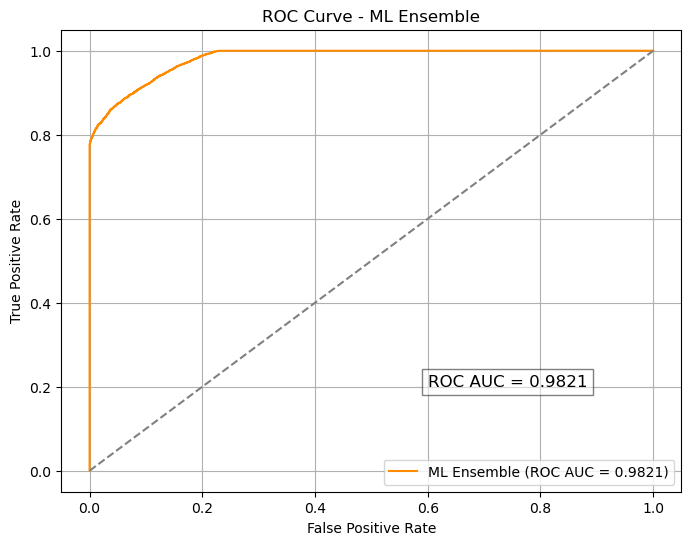

<Figure size 800x600 with 0 Axes>

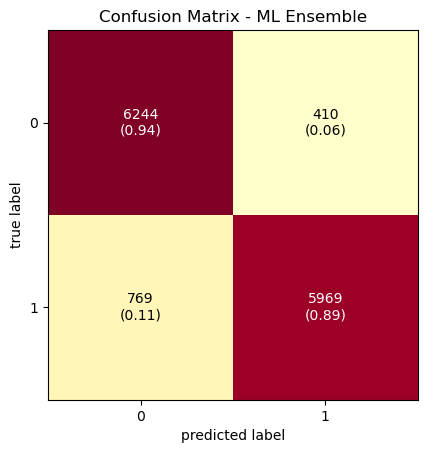

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Plot ROC curve for ML ensemble
ensemble_probs = ensemble.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ML Ensemble (ROC AUC = {roc_auc_ensemble:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Ensemble')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_ensemble:.4f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for ML Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_ensemble, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - ML Ensemble')
plt.show()


## **ROC Curve and Confusion Matrix for Ensemble Stacking Classifier (ML Ensemble, RNN, DNN)**

419/419 [==============================] - 0s 306us/step


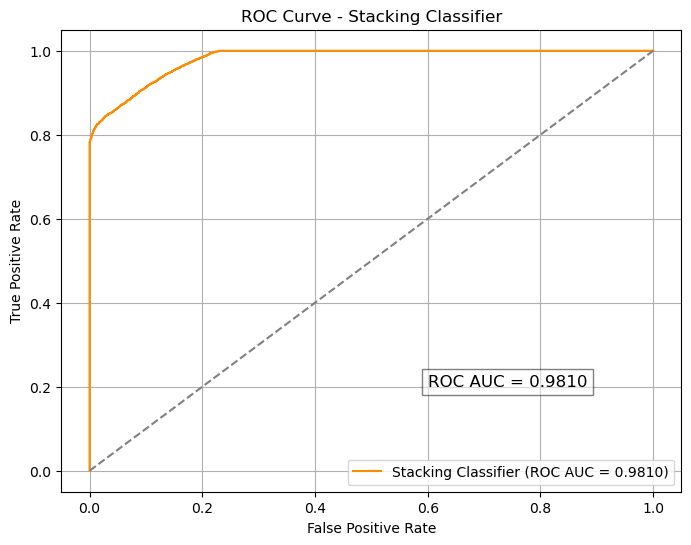

<Figure size 800x600 with 0 Axes>

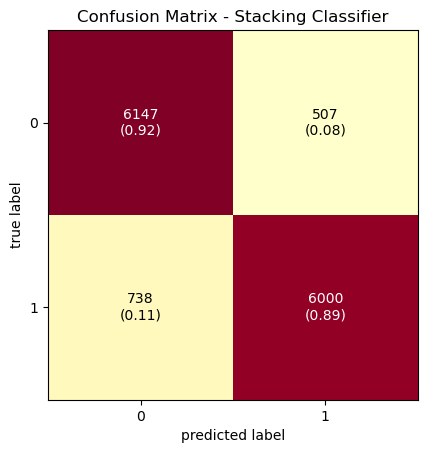

In [48]:
# Plot ROC curve for Stacking classifier
stacked_probs = ensemble_stack.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, stacked_probs)
roc_auc_stacked = roc_auc_score(y_test, stacked_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, label=f'Stacking Classifier (ROC AUC = {roc_auc_stacked:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_stacked:.4f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for Stacking classifier
cm_stacked = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_stacked, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()


## ALL ENSEMBLE

In [49]:
class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)
        return predictions

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        probabilities = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack((1 - probabilities, probabilities))

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return np.round(self.keras_model.predict(X)).astype(int)

    def predict_proba(self, X):
        probabilities = self.keras_model.predict(X)
        return np.column_stack((1 - probabilities, probabilities))


all_ensemble = VotingClassifier(estimators=[
    ('rnn', RNNWrapper(rnn_model)),
    ('keras', KerasWrapper(kdnn_model)),
    ('KNN', knn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb_model)
], voting='hard')


all_ensemble.fit(x_train, y_train)


all_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, all_pred)
print("Accuracy of Ensemble of DL and ML:", accuracy)

Learning rate set to 0.056385
0:	learn: 0.5546368	total: 5.78ms	remaining: 5.77s
1:	learn: 0.4542721	total: 10.8ms	remaining: 5.41s
2:	learn: 0.3798850	total: 15.6ms	remaining: 5.18s
3:	learn: 0.3261547	total: 20.4ms	remaining: 5.08s
4:	learn: 0.2886399	total: 25.2ms	remaining: 5.01s
5:	learn: 0.2581734	total: 29.5ms	remaining: 4.89s
6:	learn: 0.2338652	total: 34.5ms	remaining: 4.89s
7:	learn: 0.2163498	total: 39.1ms	remaining: 4.84s
8:	learn: 0.2020541	total: 43.9ms	remaining: 4.84s
9:	learn: 0.1966435	total: 49.5ms	remaining: 4.9s
10:	learn: 0.1888973	total: 54.6ms	remaining: 4.91s
11:	learn: 0.1825103	total: 59.6ms	remaining: 4.91s
12:	learn: 0.1776028	total: 64.3ms	remaining: 4.88s
13:	learn: 0.1736715	total: 68.9ms	remaining: 4.86s
14:	learn: 0.1696911	total: 74.1ms	remaining: 4.87s
15:	learn: 0.1675403	total: 78.4ms	remaining: 4.82s
16:	learn: 0.1657274	total: 82.9ms	remaining: 4.79s
17:	learn: 0.1631972	total: 87.5ms	remaining: 4.77s
18:	learn: 0.1610498	total: 92.5ms	remaining:

160:	learn: 0.1453521	total: 804ms	remaining: 4.19s
161:	learn: 0.1453040	total: 809ms	remaining: 4.18s
162:	learn: 0.1452591	total: 814ms	remaining: 4.18s
163:	learn: 0.1452234	total: 819ms	remaining: 4.17s
164:	learn: 0.1451822	total: 824ms	remaining: 4.17s
165:	learn: 0.1451365	total: 829ms	remaining: 4.16s
166:	learn: 0.1451033	total: 835ms	remaining: 4.16s
167:	learn: 0.1450522	total: 839ms	remaining: 4.16s
168:	learn: 0.1449819	total: 845ms	remaining: 4.15s
169:	learn: 0.1449339	total: 850ms	remaining: 4.15s
170:	learn: 0.1448938	total: 855ms	remaining: 4.15s
171:	learn: 0.1448505	total: 860ms	remaining: 4.14s
172:	learn: 0.1448148	total: 866ms	remaining: 4.14s
173:	learn: 0.1447684	total: 871ms	remaining: 4.14s
174:	learn: 0.1446968	total: 876ms	remaining: 4.13s
175:	learn: 0.1446466	total: 881ms	remaining: 4.12s
176:	learn: 0.1445763	total: 888ms	remaining: 4.13s
177:	learn: 0.1445406	total: 893ms	remaining: 4.12s
178:	learn: 0.1444692	total: 900ms	remaining: 4.13s
179:	learn: 

322:	learn: 0.1381857	total: 1.61s	remaining: 3.38s
323:	learn: 0.1380781	total: 1.62s	remaining: 3.38s
324:	learn: 0.1380533	total: 1.62s	remaining: 3.37s
325:	learn: 0.1380259	total: 1.63s	remaining: 3.37s
326:	learn: 0.1379761	total: 1.64s	remaining: 3.37s
327:	learn: 0.1379446	total: 1.64s	remaining: 3.36s
328:	learn: 0.1378927	total: 1.65s	remaining: 3.35s
329:	learn: 0.1378409	total: 1.65s	remaining: 3.35s
330:	learn: 0.1377962	total: 1.66s	remaining: 3.35s
331:	learn: 0.1377334	total: 1.66s	remaining: 3.34s
332:	learn: 0.1376849	total: 1.67s	remaining: 3.34s
333:	learn: 0.1376405	total: 1.67s	remaining: 3.33s
334:	learn: 0.1376027	total: 1.68s	remaining: 3.33s
335:	learn: 0.1375585	total: 1.68s	remaining: 3.32s
336:	learn: 0.1375215	total: 1.69s	remaining: 3.31s
337:	learn: 0.1374816	total: 1.69s	remaining: 3.31s
338:	learn: 0.1374335	total: 1.7s	remaining: 3.31s
339:	learn: 0.1373958	total: 1.7s	remaining: 3.3s
340:	learn: 0.1373315	total: 1.71s	remaining: 3.29s
341:	learn: 0.1

482:	learn: 0.1313838	total: 2.43s	remaining: 2.6s
483:	learn: 0.1313376	total: 2.43s	remaining: 2.6s
484:	learn: 0.1313058	total: 2.44s	remaining: 2.59s
485:	learn: 0.1312751	total: 2.44s	remaining: 2.58s
486:	learn: 0.1312288	total: 2.45s	remaining: 2.58s
487:	learn: 0.1311919	total: 2.46s	remaining: 2.58s
488:	learn: 0.1311656	total: 2.46s	remaining: 2.57s
489:	learn: 0.1311299	total: 2.47s	remaining: 2.57s
490:	learn: 0.1311082	total: 2.47s	remaining: 2.56s
491:	learn: 0.1310681	total: 2.48s	remaining: 2.56s
492:	learn: 0.1310270	total: 2.48s	remaining: 2.55s
493:	learn: 0.1309985	total: 2.48s	remaining: 2.55s
494:	learn: 0.1309638	total: 2.49s	remaining: 2.54s
495:	learn: 0.1309101	total: 2.5s	remaining: 2.54s
496:	learn: 0.1308636	total: 2.5s	remaining: 2.53s
497:	learn: 0.1308064	total: 2.51s	remaining: 2.53s
498:	learn: 0.1307796	total: 2.51s	remaining: 2.52s
499:	learn: 0.1307317	total: 2.52s	remaining: 2.52s
500:	learn: 0.1306930	total: 2.52s	remaining: 2.51s
501:	learn: 0.13

680:	learn: 0.1241785	total: 3.43s	remaining: 1.61s
681:	learn: 0.1241546	total: 3.44s	remaining: 1.6s
682:	learn: 0.1241110	total: 3.44s	remaining: 1.6s
683:	learn: 0.1240846	total: 3.44s	remaining: 1.59s
684:	learn: 0.1240484	total: 3.45s	remaining: 1.59s
685:	learn: 0.1240221	total: 3.46s	remaining: 1.58s
686:	learn: 0.1239751	total: 3.46s	remaining: 1.58s
687:	learn: 0.1239513	total: 3.46s	remaining: 1.57s
688:	learn: 0.1239053	total: 3.47s	remaining: 1.57s
689:	learn: 0.1238761	total: 3.48s	remaining: 1.56s
690:	learn: 0.1238376	total: 3.48s	remaining: 1.56s
691:	learn: 0.1238034	total: 3.49s	remaining: 1.55s
692:	learn: 0.1237800	total: 3.49s	remaining: 1.55s
693:	learn: 0.1237539	total: 3.5s	remaining: 1.54s
694:	learn: 0.1237020	total: 3.5s	remaining: 1.54s
695:	learn: 0.1236681	total: 3.51s	remaining: 1.53s
696:	learn: 0.1236368	total: 3.51s	remaining: 1.53s
697:	learn: 0.1235976	total: 3.52s	remaining: 1.52s
698:	learn: 0.1235629	total: 3.52s	remaining: 1.52s
699:	learn: 0.12

839:	learn: 0.1190199	total: 4.24s	remaining: 807ms
840:	learn: 0.1189723	total: 4.24s	remaining: 802ms
841:	learn: 0.1189416	total: 4.25s	remaining: 797ms
842:	learn: 0.1189146	total: 4.25s	remaining: 792ms
843:	learn: 0.1188674	total: 4.25s	remaining: 787ms
844:	learn: 0.1188320	total: 4.26s	remaining: 781ms
845:	learn: 0.1187758	total: 4.26s	remaining: 776ms
846:	learn: 0.1187364	total: 4.27s	remaining: 771ms
847:	learn: 0.1187095	total: 4.27s	remaining: 766ms
848:	learn: 0.1186807	total: 4.28s	remaining: 761ms
849:	learn: 0.1186595	total: 4.29s	remaining: 756ms
850:	learn: 0.1186301	total: 4.29s	remaining: 751ms
851:	learn: 0.1185997	total: 4.29s	remaining: 746ms
852:	learn: 0.1185655	total: 4.3s	remaining: 741ms
853:	learn: 0.1185350	total: 4.31s	remaining: 736ms
854:	learn: 0.1185039	total: 4.31s	remaining: 731ms
855:	learn: 0.1184693	total: 4.32s	remaining: 726ms
856:	learn: 0.1184534	total: 4.32s	remaining: 721ms
857:	learn: 0.1184232	total: 4.33s	remaining: 716ms
858:	learn: 0

Accuracy of Ensemble of DL and ML: 0.9119623655913979


In [50]:
all_ensemble_accuracy = metrics.accuracy_score(y_test, all_pred)
all_ensemble_precision = precision_score(y_test, all_pred)
all_ensemble_recall = recall_score(y_test, all_pred)
all_ensemble_f1 = f1_score(y_test, all_pred)
all_ensemble_roc_auc = roc_auc_score(y_test, all_pred)

print("Ensemble of DL and ML Metrics:")
print(f"Accuracy: {all_ensemble_accuracy:.4f}")
print(f"Precision: {all_ensemble_precision:.4f}")
print(f"Recall: {all_ensemble_recall:.4f}")
print(f"F1 Score: {all_ensemble_f1:.4f}")
#print(f"ROC AUC Score: {all_ensemble_roc_auc:.4f}")

Ensemble of DL and ML Metrics:
Accuracy: 0.9120
Precision: 0.9357
Recall: 0.8859
F1 Score: 0.9101
